# Dealing with missing data

In [1]:
print("""
@Description: Dealing with missing data
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-06-06 17:25:58
""")


@Description: Dealing with missing data
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-06-06 17:25:58



In [2]:
import pandas as pd
from io import StringIO

In [3]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

## Eliminating training examples or features with missing values

In [5]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
# drop rows that have fewer than 4 real values
df.dropna(thresh=4, axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputing missing values

In [10]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [11]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Understanding the scikit-learn estimator API

# Handling categorical data

## Categorical data encoding with pandas

In [12]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


## Mapping ordinal features

In [13]:
size_mapping = {'XL':3, 'L':2, 'M': 1}

In [14]:
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [15]:
inv_size_mapping = {v: k for (k, v) in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding class labels

In [16]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [17]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [18]:
inv_class_mapping = {v: k for (k, v) in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [19]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [20]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

## Performing one-hot encoding on nominal features

In [21]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [23]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [24]:
pd.get_dummies(df[['color', 'size', 'price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,0,1,0
1,2,13.5,0,0,1
2,3,15.3,1,0,0


In [25]:
pd.get_dummies(df[['color', 'size', 'price']],
               drop_first=True).astype('float')

,size,price,color_green,color_red
0,1.0,10.1,1.0,0.0
1,2.0,13.5,0.0,1.0
2,3.0,15.3,0.0,0.0


In [26]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

## Optional: encoding ordinal features

In [27]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [28]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


# Partitioning a dataset into separate training and test datasets

In [2]:
import sys
sys.path.append('./')
sys.path.append('../')
import numpy as np

In [3]:
from data.get_data import DataLoader
dl = DataLoader()
df_wine = dl.get_wine()

In [4]:
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

In [5]:
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [6]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = dl.get_train_test(test_size=.3, random_state=0)

# Bringing features onto the same scale

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [9]:
ex = np.arange(6)
print('standardized:', (ex-ex.mean())/ex.std())
print('normalized:', (ex-ex.min())/(ex.max()-ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Selecting meaningful features

## Sparse solutions with L1 regularization

In [11]:
# 'lbfgs' currently does not support L1-regularized loss optimization
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [12]:
lr = LogisticRegression(penalty='l1', C=1.0, 
                        solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


In [13]:
lr.intercept_

array([-1.45922475, -1.37858198, -2.06944908])

Since we fit the LogisticRegression object on a multiclass dataset via the one-versus-rest (OvR) approach, the first intercept belongs to the model that fits class 1 versus classes 2 and 3, the second value is the intercept of the model that fits class 2 versus classes 1 and 3, and the third value is the intercept of the model that fits class 3 versus classes 1 and 2:

In [14]:
lr.coef_

array([[ 1.2802678 ,  0.2154249 ,  0.66109969, -1.24721037,  0.        ,
         0.        ,  0.95845656,  0.        ,  0.        ,  0.        ,
         0.        ,  0.9603276 ,  2.05847893],
       [-0.93383228, -0.58395727, -0.93504542,  0.46620096,  0.        ,
         0.        ,  0.        ,  0.03993838,  0.49445271, -2.45734166,
         1.01376692,  0.        , -2.17657657],
       [ 0.        ,  0.20600308,  0.35276897,  0.        ,  0.        ,
         0.        , -2.10532591,  0.        ,  0.        ,  1.99763228,
        -0.65663364, -0.89524289,  0.        ]])

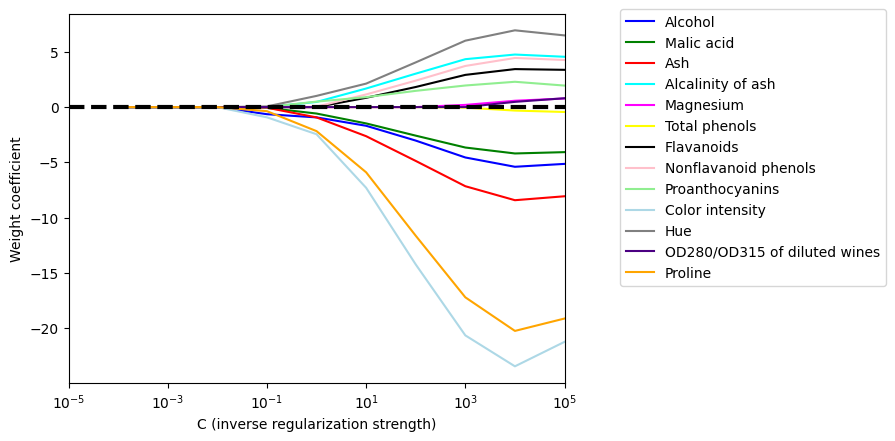

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in range(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, solver='liblinear', multi_class='ovr', random_state=42)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:,column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

## Sequential feature selection algorithms

In [49]:
from modelsNN.SBS import SBS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

In [50]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 9, 11, 12),
 (0, 1, 2, 3, 5, 6, 9, 11, 12),
 (0, 1, 2, 3, 6, 9, 11, 12),
 (1, 2, 3, 6, 9, 11, 12),
 (1, 2, 3, 6, 11, 12),
 (1, 2, 3, 6, 11),
 (1, 2, 3, 11),
 (2, 3, 11),
 (3, 11),
 (11,)]

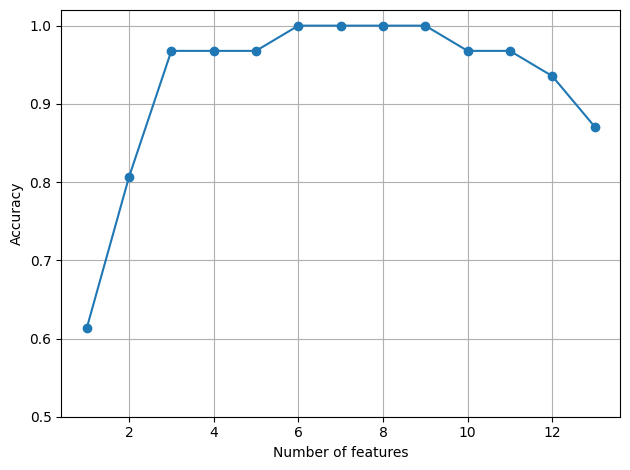

In [57]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.score_, marker='o')
plt.ylim([.5, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [63]:
k3 = list(sbs.subsets_[-3])
df_wine.columns[1:][k3]

Index(['Ash', 'Alcalinity of ash', 'OD280/OD315 of diluted wines'], dtype='object')

In [66]:
knn.fit(X_train_std, y_train)
knn.score(X_train_std, y_train)

0.9758064516129032

In [67]:
knn.score(X_test_std, y_test)

1.0

In [68]:
knn.fit(X_train_std[:, k3], y_train)
knn.score(X_train_std[:, k3], y_train)

0.8951612903225806

In [70]:
knn.score(X_test_std[:, k3], y_test)

0.8148148148148148

In [71]:
from sklearn.feature_selection import SequentialFeatureSelector